<a href="https://colab.research.google.com/github/TirsitEndeshaw/Data-Analysis-projects/blob/main/Banking_Project_Tirsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') #to ignore warnings
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

# Step One: Importing the Libraries and Data Preparation

### 1.1 Perform preliminary data inspection and report the findings like the structure of the data, missing values, duplicates, etc.


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/data (1).xlsx") # Loading dataset

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,2018-10-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [ ]:
#to Check null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
null_unique

,nulls,unique
UniqueID,0,233154
disbursed_amount,0,24565
asset_cost,0,46252
ltv,0,6579
branch_id,0,82
supplier_id,0,2953
manufacturer_id,0,11
Current_pincode_ID,0,6698
Date.of.Birth,0,15433
Employment.Type,7661,2


In [ ]:
round((df.isnull().sum()/df.shape[0])*100,2)

,0
UniqueID,0.00
disbursed_amount,0.00
asset_cost,0.00
ltv,0.00
branch_id,0.00
supplier_id,0.00
manufacturer_id,0.00
Current_pincode_ID,0.00
Date.of.Birth,0.00
Employment.Type,3.29


In [ ]:
df[df.duplicated()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

### 1.2 Variable names in the data may not be in accordance with the identifier naming in Python. Change the variable names accordingly.


In [ ]:
# Function to convert column names to valid Python identifiers
def to_valid_identifier(name):
    return name.lower().replace('.', '_').replace(' ', '_')

# Apply the function to the column names
df.columns = [to_valid_identifier(col) for col in df.columns]

# Display the first few rows to verify the changes
df.head()


,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,2018-10-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


### 1.3 The presented data might also contain missing values, therefore, exploration will also lead to devising strategies to fill in the missing values. Devise strategies while exploring the data.


In [ ]:
# Strategy to handle missing values
# Example strategies:
# - For numerical columns, fill missing values with the mean or median
# - For categorical columns, fill missing values with the mode or a placeholder value

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())  # or use df[numerical_cols].median()
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # or use a placeholder like 'Unknown'

# Verify the changes
print(df.isnull().sum())



uniqueid                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
current_pincode_id                     0
date_of_birth                          0
employment_type                        0
disbursaldate                          0
state_id                               0
employee_code_id                       0
mobileno_avl_flag                      0
aadhar_flag                            0
pan_flag                               0
voterid_flag                           0
driving_flag                           0
passport_flag                          0
perform_cns_score                      0
perform_cns_score_description          0
pri_no_of_accts                        0
pri_active_accts                       0
pri_overdue_accts                      0
pri_current_bala

# Step two:  Statistical Description

### 2.1. Provide the statistical description of the quantitative data variables


In [ ]:
df.describe()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,1984-04-04 04:32:39.947502400,2018-09-23 09:57:53.079595520,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1949-09-15 00:00:00,2018-08-01 00:00:00,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,1977-05-04 00:00:00,2018-08-30 00:00:00,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,1986-01-01 00:00:00,2018-09-25 00:00:00,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,1992-05-19 00:00:00,2018-10-21 00:00:00,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2000-10-20 00:00:00,2018-10-31 00:00:00,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252


### 2.2 How is the target variable distributed overall?

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64


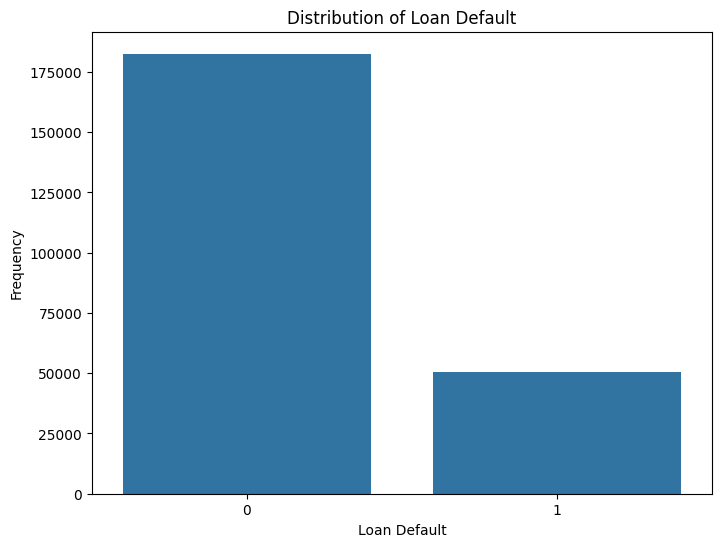

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'loan_default'
target_distribution = df['loan_default'].value_counts(normalize=True)

# Print the target distribution
print(target_distribution)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_default', data=df)
plt.title('Distribution of Loan Default')
plt.xlabel('Loan Default')
plt.ylabel('Frequency')
plt.show()


### 2.3. Study the distribution of the target variable across the various categories like branch, city, state, branch, supplier, manufacturer, etc.


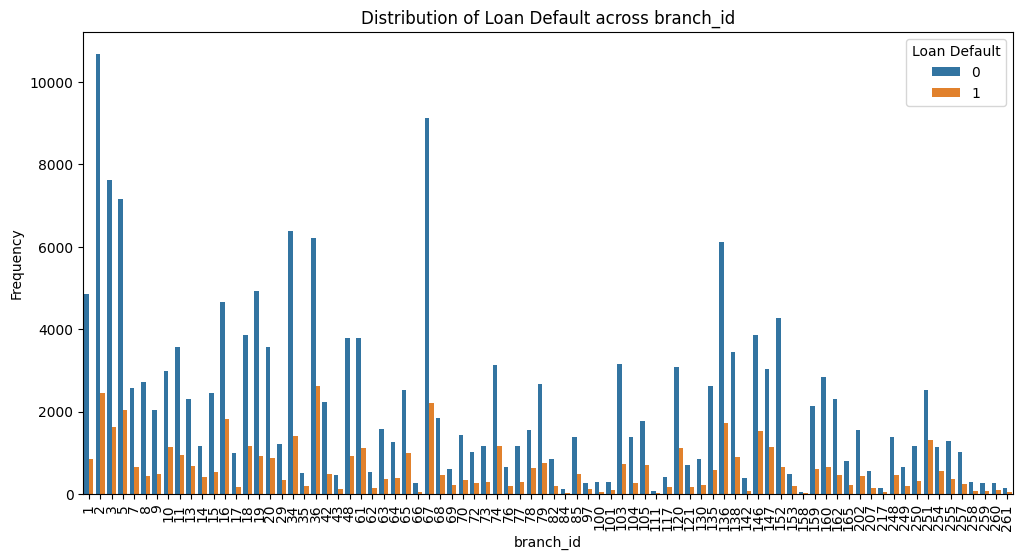

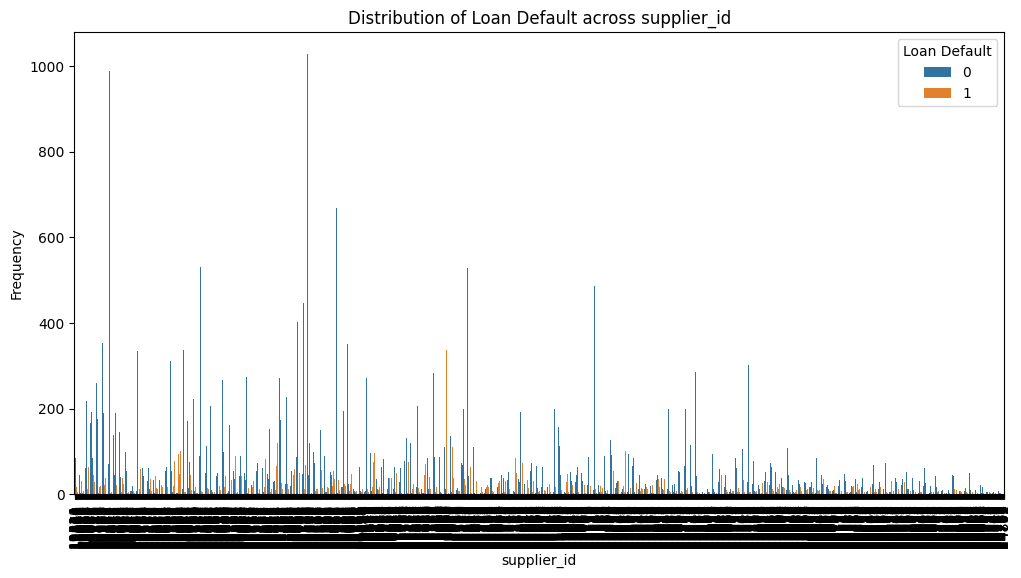

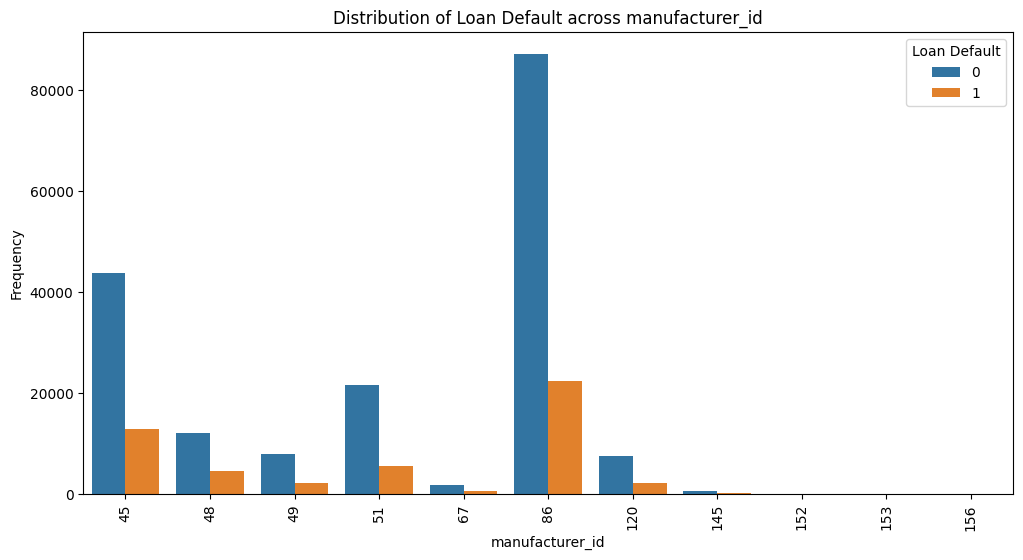

In [ ]:

# List of categorical columns to analyze
categorical_columns = ['branch_id', 'supplier_id', 'manufacturer_id']

# Plot distribution of loan default across each category
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='loan_default', data=df)
    plt.title(f'Distribution of Loan Default across {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Loan Default', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

# If there are other specific categories (like city, state) in the data, add them to the list
# Example:
# categorical_columns = ['branch_id', 'supplier_id', 'manufacturer_id', 'city', 'state']


### 2.4. What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)?  I use pie charts to express how different types of employment defines defaulter and non-defaulters.


Different Employment Types: ['Salaried' 'Self employed']
Number of missing values in Employment Type: 0
Number of missing values in Employment Type after filling: 0


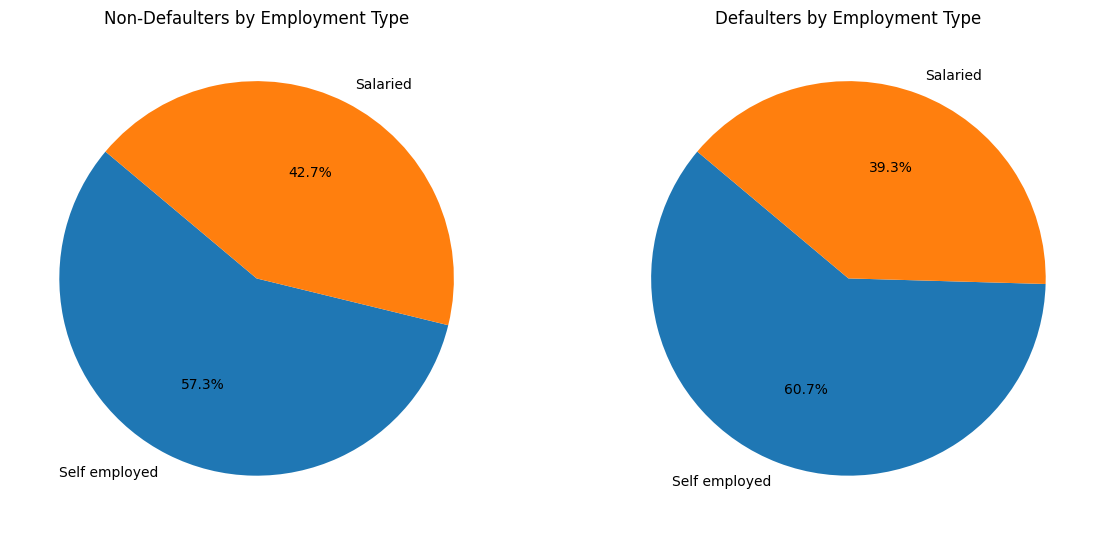

In [ ]:
# Check the different employment types and the count of missing values
employment_types = df['employment_type'].unique()
missing_values = df['employment_type'].isnull().sum()

print("Different Employment Types:", employment_types)
print("Number of missing values in Employment Type:", missing_values)

# Strategy to fill missing values
# Fill missing employment types with the mode (most common employment type)
mode_employment_type = df['employment_type'].mode()[0]
df['employment_type'].fillna(mode_employment_type, inplace=True)

# Verify the changes
missing_values_after = df['employment_type'].isnull().sum()
print("Number of missing values in Employment Type after filling:", missing_values_after)

# Plot pie charts to show the proportion of defaulters and non-defaulters by employment type
def plot_pie_charts(data, column, target):
    non_defaulters = data[data[target] == 0][column].value_counts()
    defaulters = data[data[target] == 1][column].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    ax[0].pie(non_defaulters, labels=non_defaulters.index, autopct='%1.1f%%', startangle=140)
    ax[0].set_title('Non-Defaulters by Employment Type')

    ax[1].pie(defaulters, labels=defaulters.index, autopct='%1.1f%%', startangle=140)
    ax[1].set_title('Defaulters by Employment Type')

    plt.show()

# Plot the pie charts
plot_pie_charts(df, 'employment_type', 'loan_default')


### 2.5. Has age got something to do with defaulting? What is the distribution of age w.r.t. to defaulters and non-defaulters?


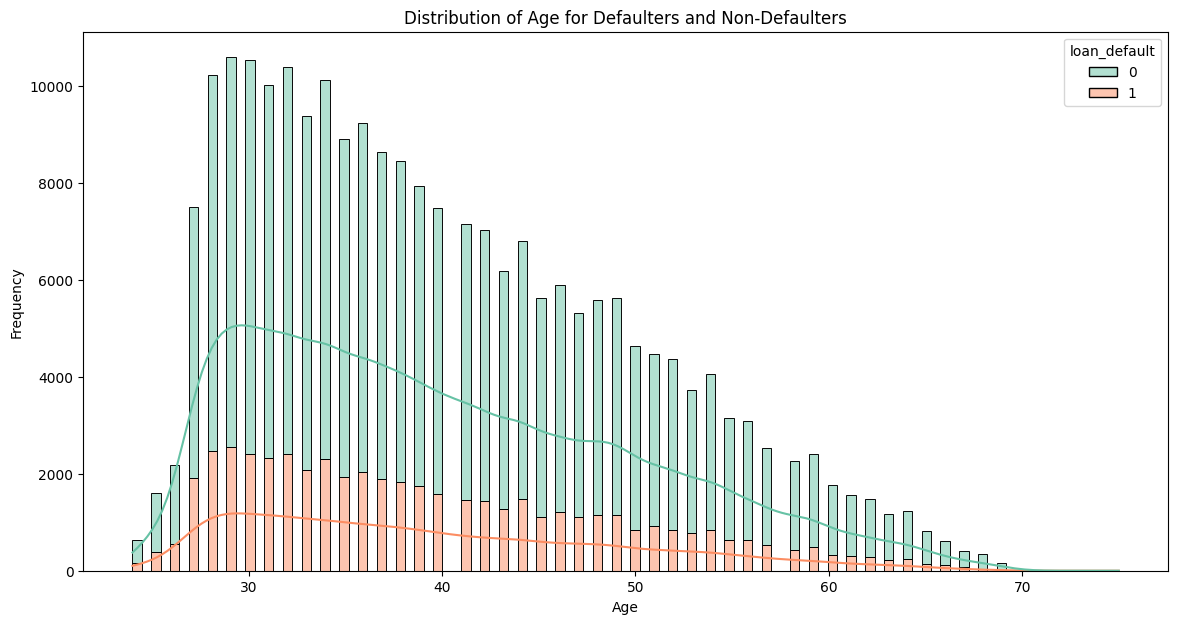

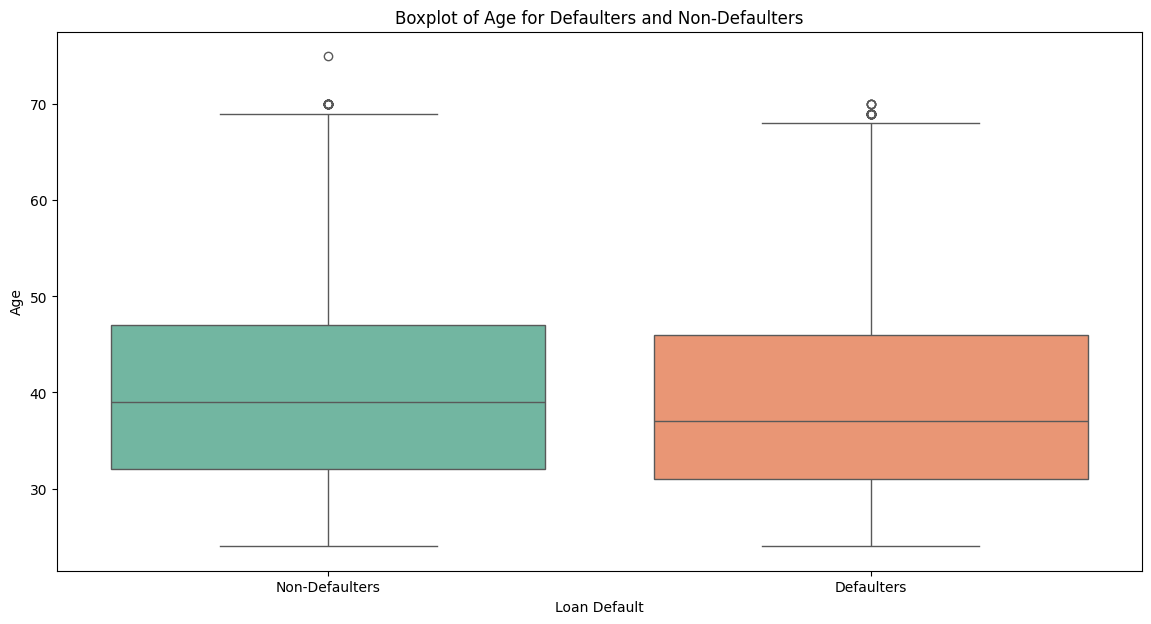

In [ ]:
from datetime import datetime

# Calculate the age of each borrower
current_year = datetime.now().year
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df['age'] = current_year - df['date_of_birth'].dt.year

# Drop rows where age could not be calculated due to invalid dates
df = df.dropna(subset=['age'])

# Plot the distribution of age for defaulters and non-defaulters
plt.figure(figsize=(14, 7))

# Histogram
sns.histplot(data=df, x='age', hue='loan_default', multiple='stack', kde=True, palette='Set2')
plt.title('Distribution of Age for Defaulters and Non-Defaulters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='loan_default', y='age', data=df, palette='Set2')
plt.title('Boxplot of Age for Defaulters and Non-Defaulters')
plt.xlabel('Loan Default')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()


### 2.6. What type of ID is presented by most of the customers as proofs?


ID Proof Type Counts:
aadhar_flag      195924
pan_flag          17621
voterid_flag      33794
driving_flag       5419
passport_flag       496
dtype: int64


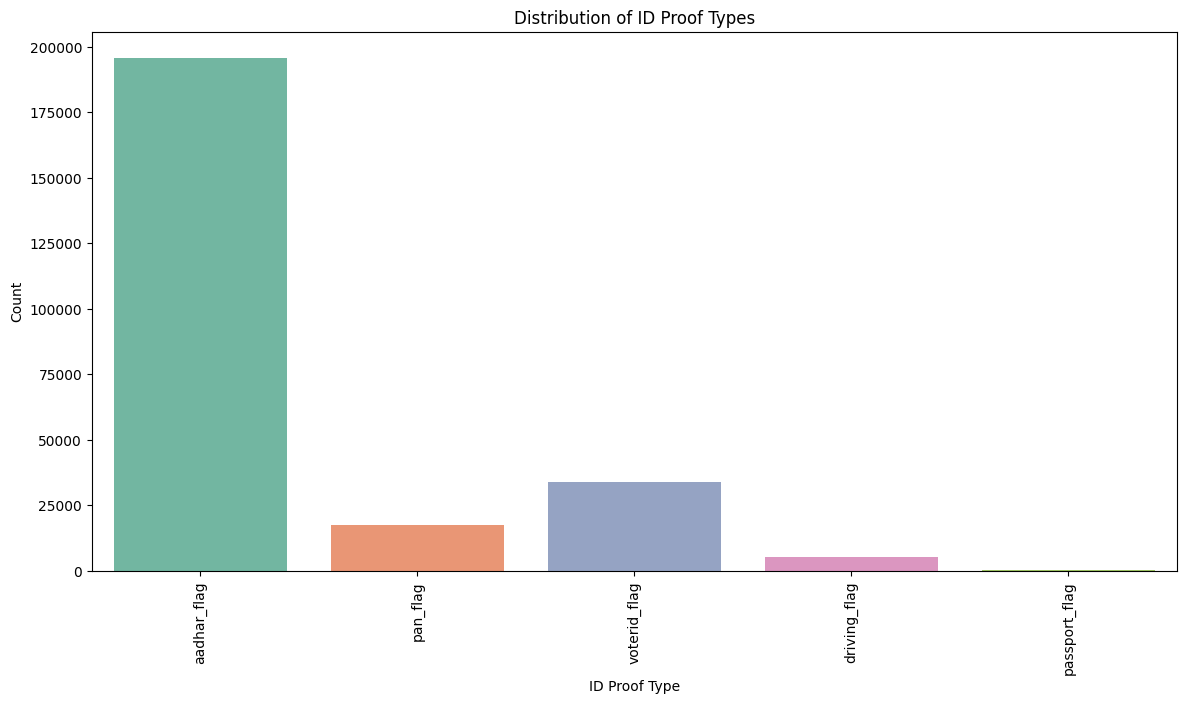

In [ ]:
# List of ID proof columns
id_proof_columns = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']

# Verify that the columns exist in the dataframe
id_proof_columns = [col for col in id_proof_columns if col in df.columns]

# Check if we have the relevant columns in the dataset
if id_proof_columns:
    # Calculate the count of each ID proof type
    id_proof_counts = df[id_proof_columns].sum()

    # Print the counts
    print("ID Proof Type Counts:")
    print(id_proof_counts)

    # Plot the distribution of ID proof types
    plt.figure(figsize=(14, 7))
    sns.barplot(x=id_proof_counts.index, y=id_proof_counts.values, palette='Set2')
    plt.title('Distribution of ID Proof Types')
    plt.xlabel('ID Proof Type')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("None of the specified ID proof columns were found in the dataset.")


# Step three: Data Exploration

### 3.1. Study the credit bureau score distribution. How is the distribution for defaulters vs. non-defaulters? Explore in detail.


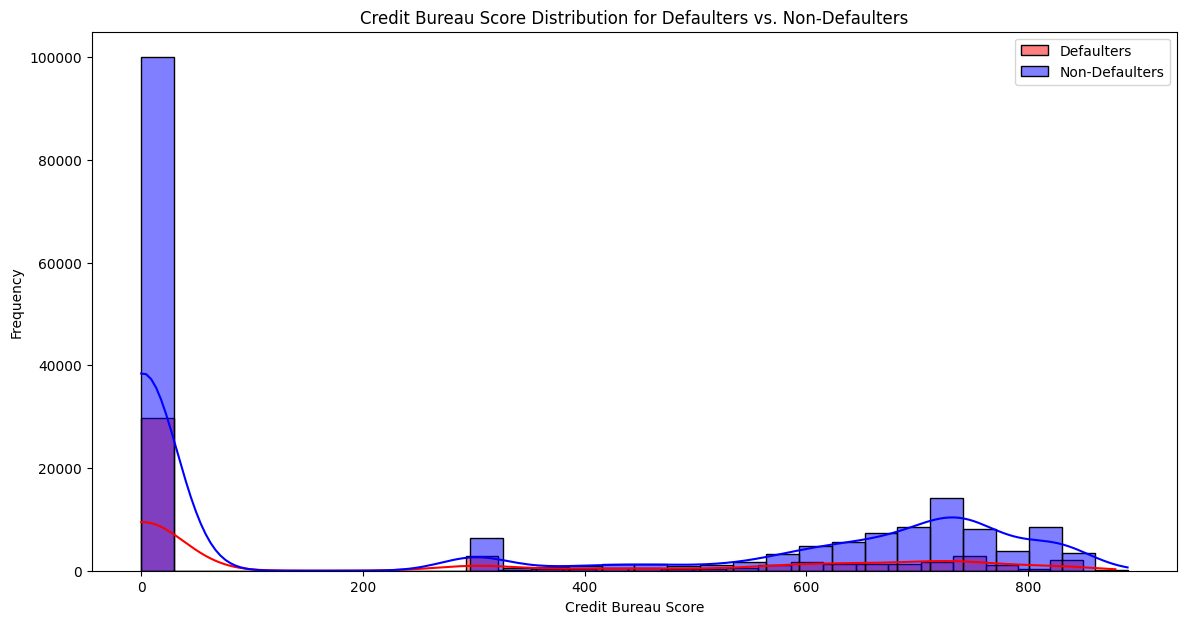

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check unique values in the 'PERFORM_CNS.SCORE' column
unique_scores = df['perform_cns_score'].unique()
#print("Unique values in 'PERFORM_CNS.SCORE':", unique_scores)

# If there are valid scores, proceed with the analysis
if len(unique_scores) > 1 or unique_scores[0] != 0:
    # Separate the data into defaulters and non-defaulters
    defaulters = df[df['loan_default'] == 1]
    non_defaulters = df[df['loan_default'] == 0]

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 7))

    # Plot the distribution of credit bureau scores for defaulters
    sns.histplot(defaulters['perform_cns_score'], kde=True, color='red', label='Defaulters', bins=30)

    # Plot the distribution of credit bureau scores for non-defaulters
    sns.histplot(non_defaulters['perform_cns_score'], kde=True, color='blue', label='Non-Defaulters', bins=30)

    # Add labels and title
    plt.title('Credit Bureau Score Distribution for Defaulters vs. Non-Defaulters')
    plt.xlabel('Credit Bureau Score')
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()


### 3.2. Explore the primary and secondary account details. Is the information in some way related to the loan default probability?


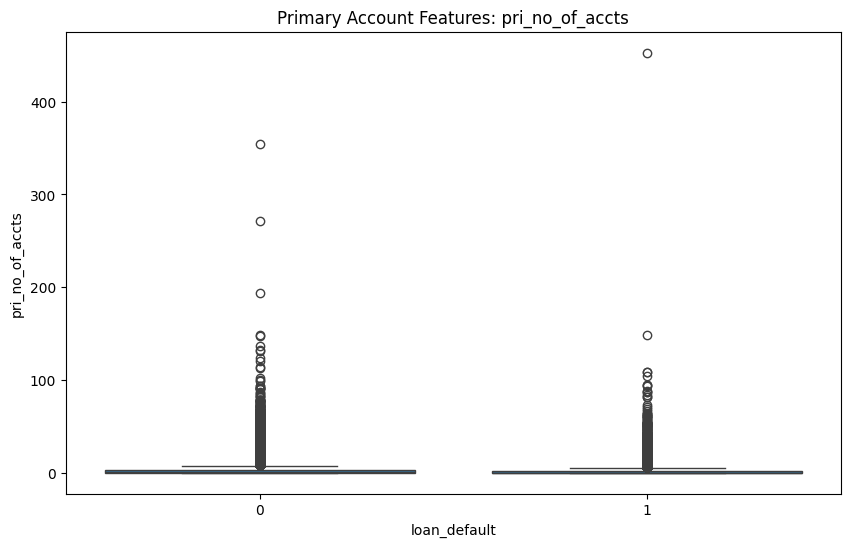

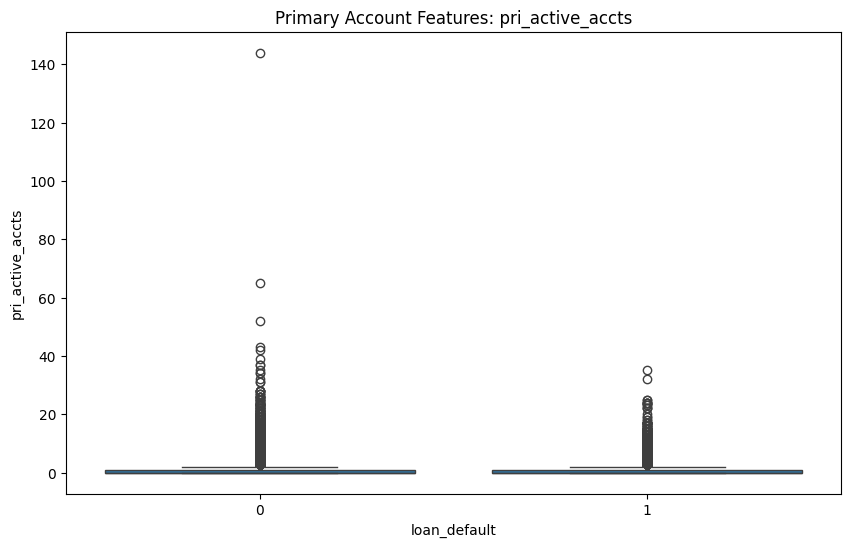

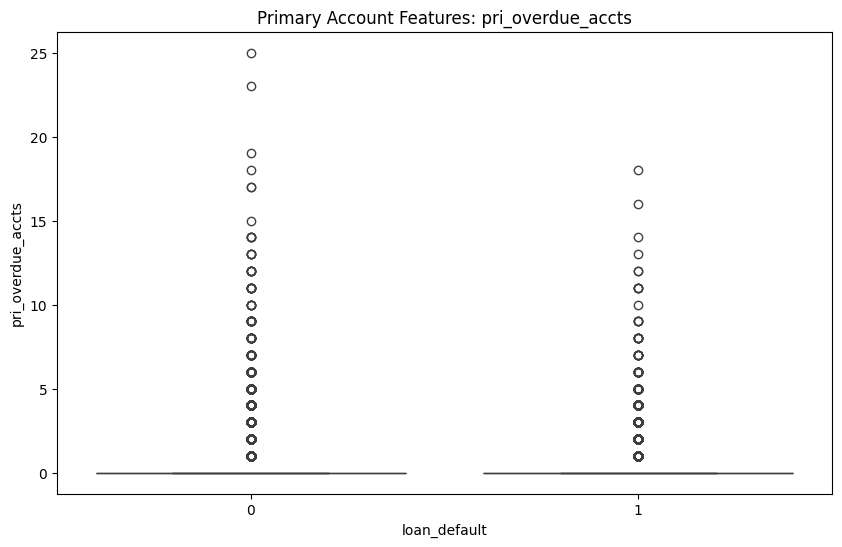

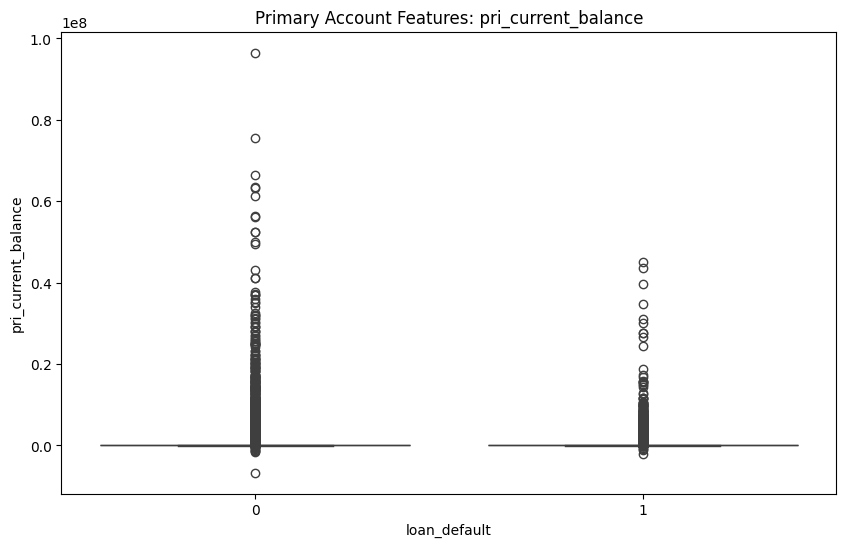

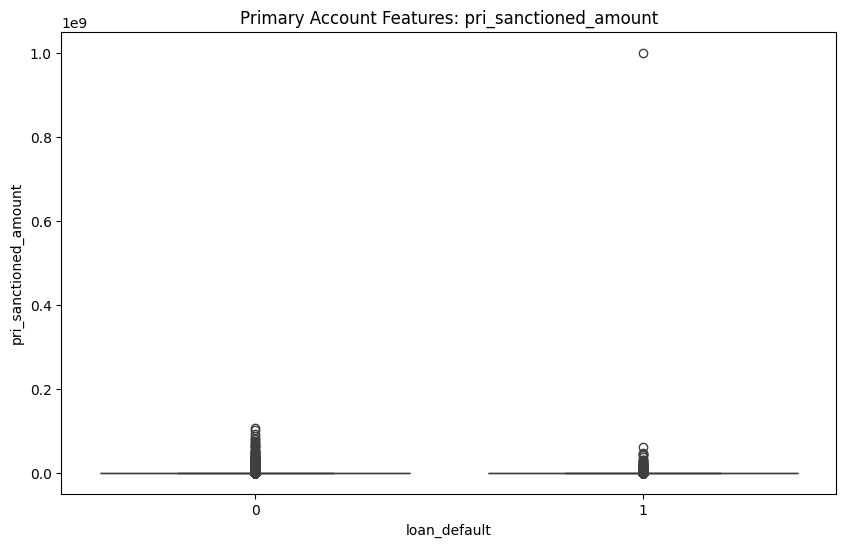

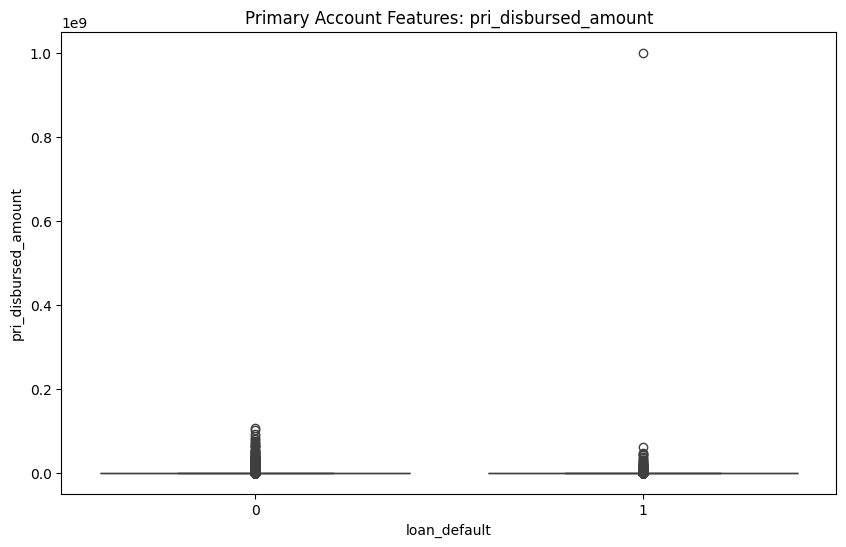

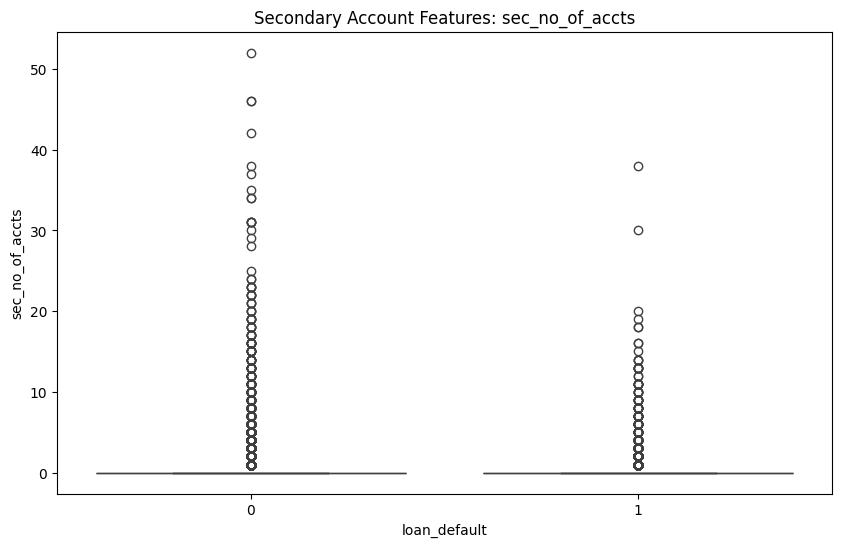

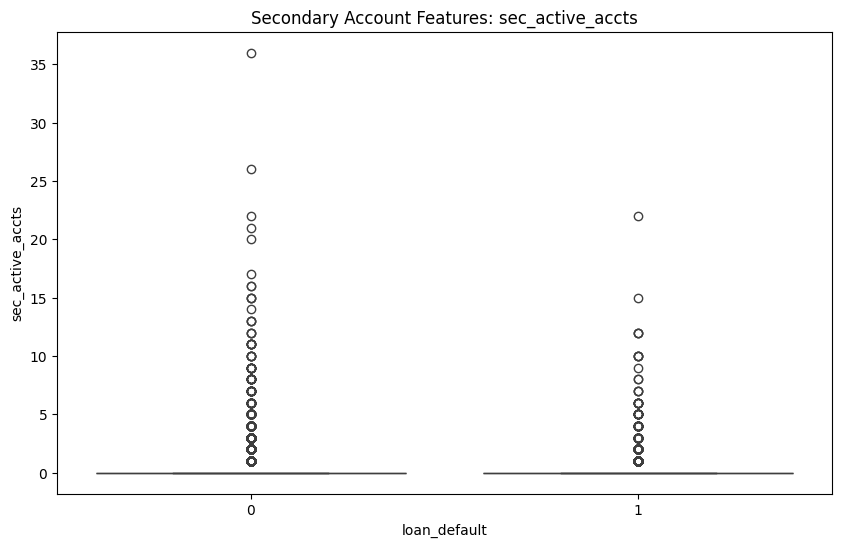

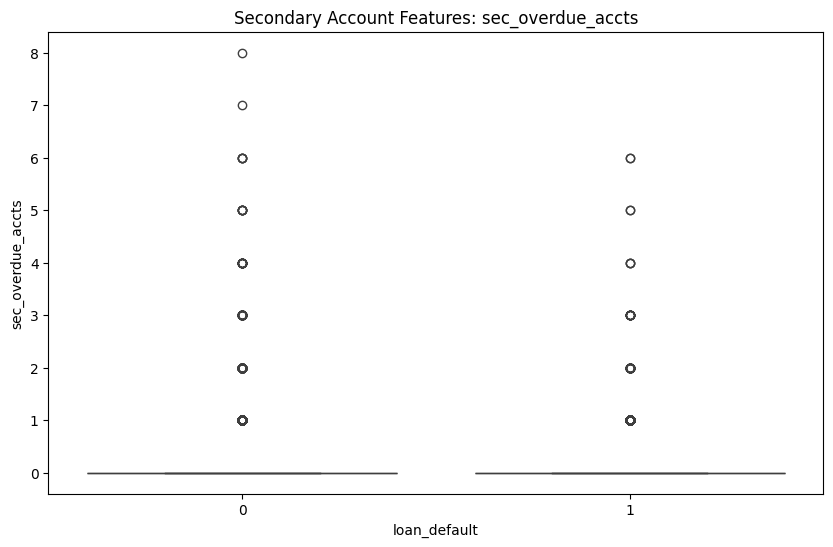

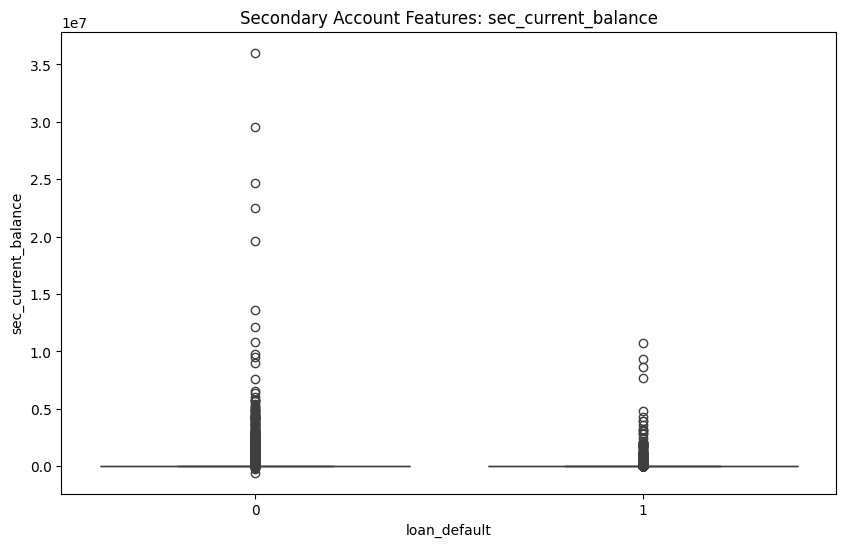

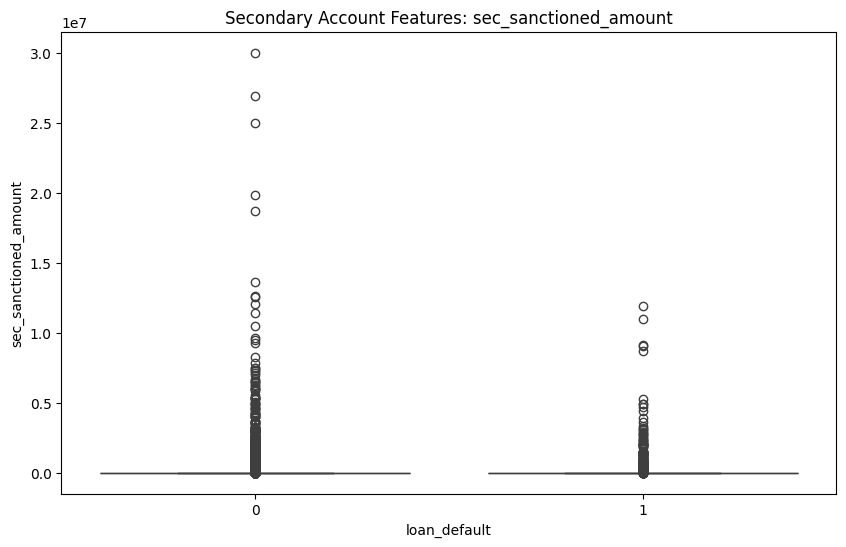

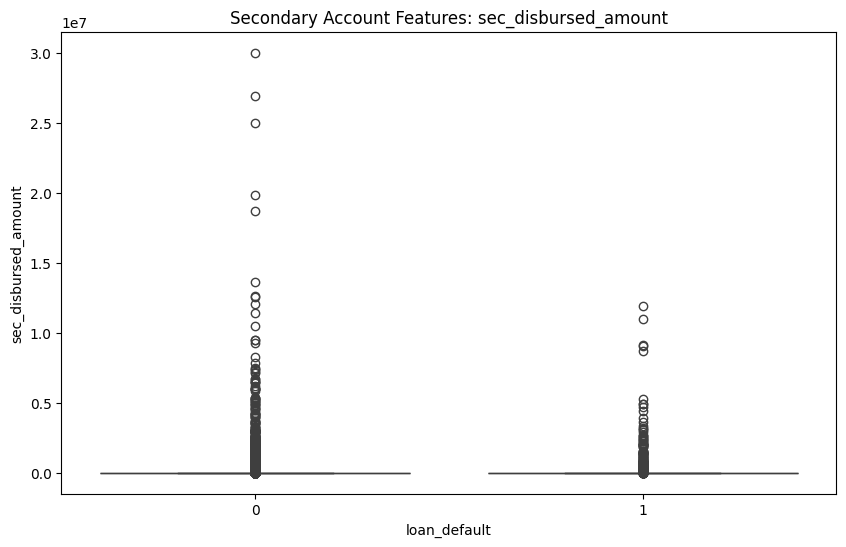


T-tests for Primary Account Features:

T-tests for Secondary Account Features:


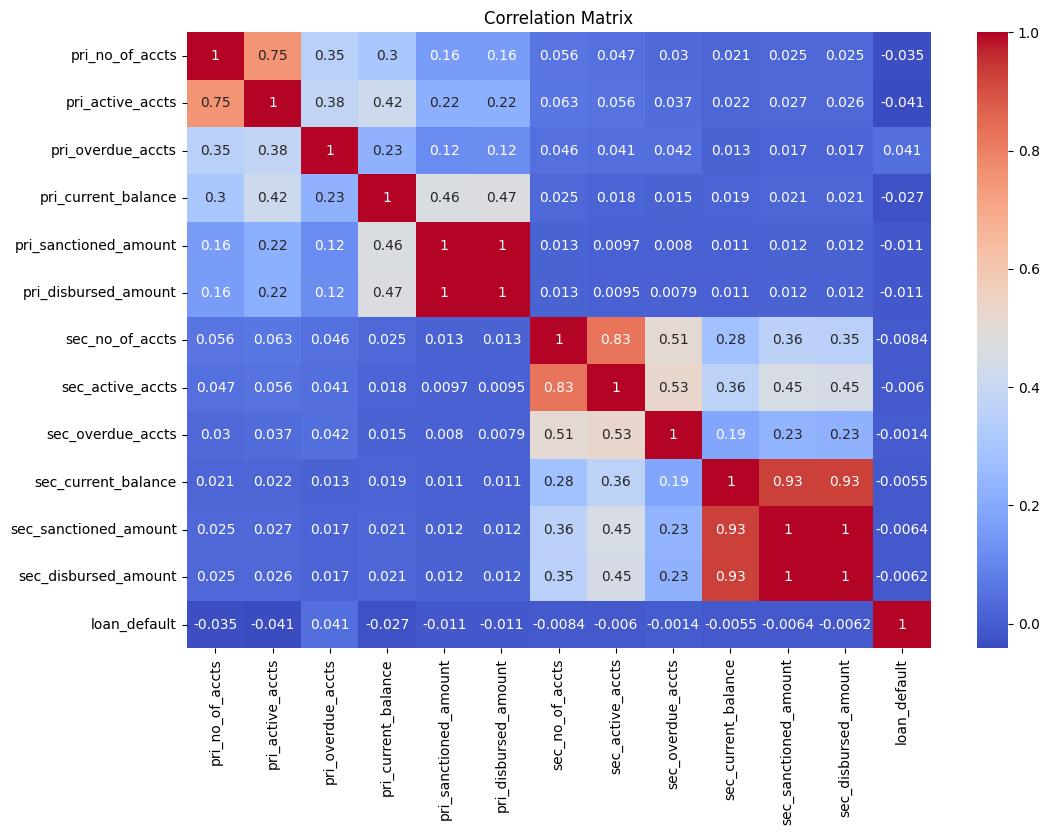

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Inspect the primary and secondary account details
primary_features = ['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance',
                    'pri_sanctioned_amount', 'pri_disbursed_amount']
secondary_features = ['sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
                      'sec_sanctioned_amount', 'sec_disbursed_amount']

# Calculate basic statistics
primary_stats = df[primary_features].describe()
secondary_stats = df[secondary_features].describe()

#print("Primary Account Details Statistics:\n", primary_stats)
#print("\nSecondary Account Details Statistics:\n", secondary_stats)

# Visualize the data
def plot_features(features, target, title):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'{title}: {feature}')
        plt.show()

plot_features(primary_features, 'loan_default', 'Primary Account Features')
plot_features(secondary_features, 'loan_default', 'Secondary Account Features')

# Perform statistical tests
def t_test_features(features, target):
    for feature in features:
        default = df[df[target] == 1][feature]
        non_default = df[df[target] == 0][feature]
        t_stat, p_value = stats.ttest_ind(default, non_default, nan_policy='omit')
        print(f'T-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}')

print("\nT-tests for Primary Account Features:")
#t_test_features(primary_features, 'loan_default')

print("\nT-tests for Secondary Account Features:")
#t_test_features(secondary_features, 'loan_default')

# Check correlations
correlation_matrix = df[primary_features + secondary_features + ['loan_default']].corr()
#print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3.3. Is there a difference between the sanctioned and disbursed amount of primary and secondary loans? Study the difference by providing appropriate statistics and graphs.


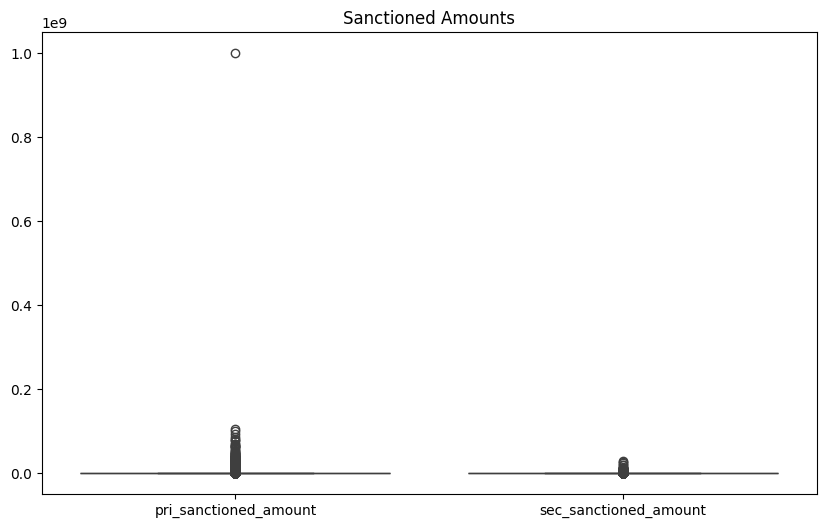

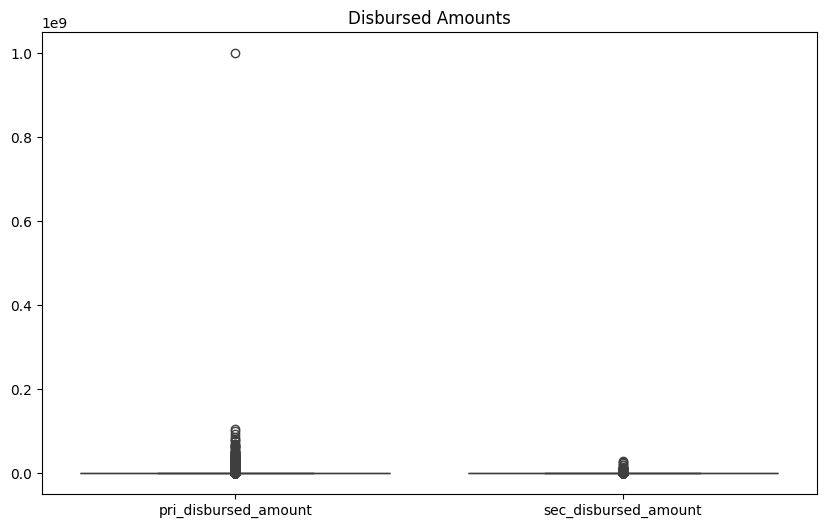

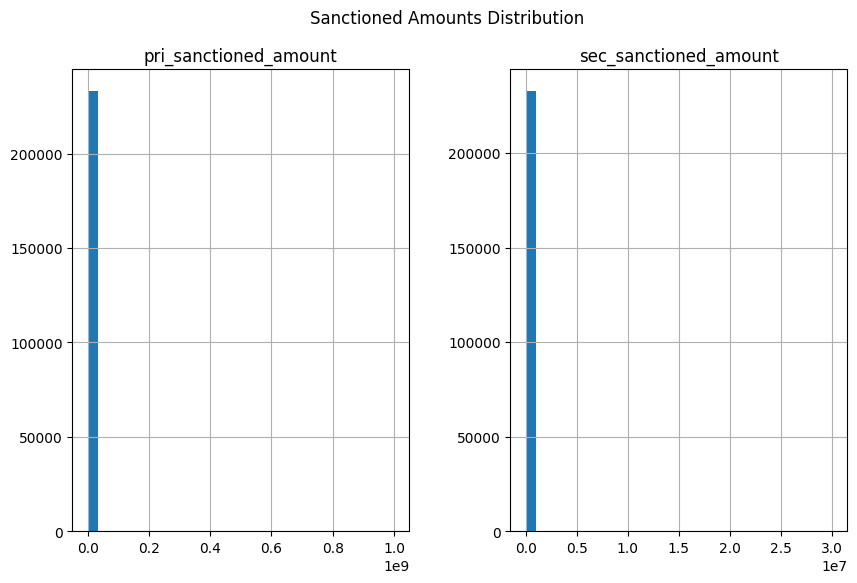

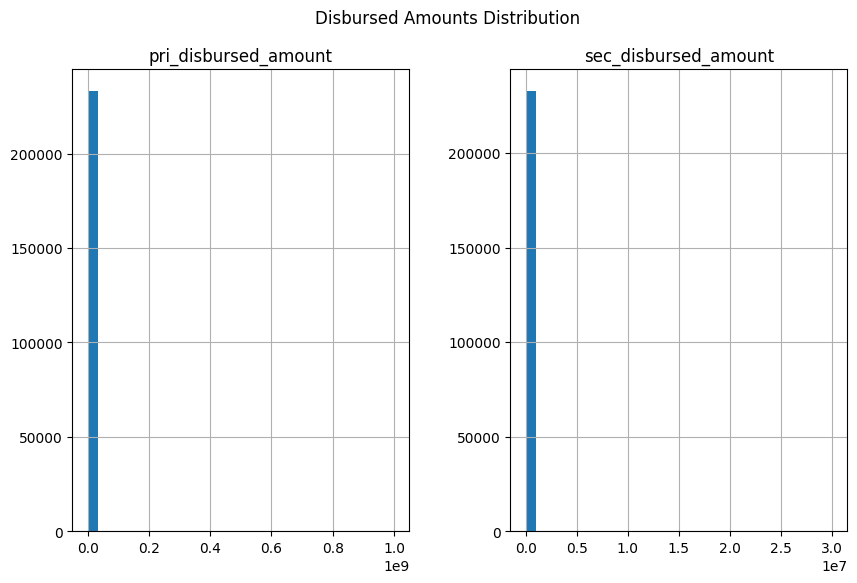

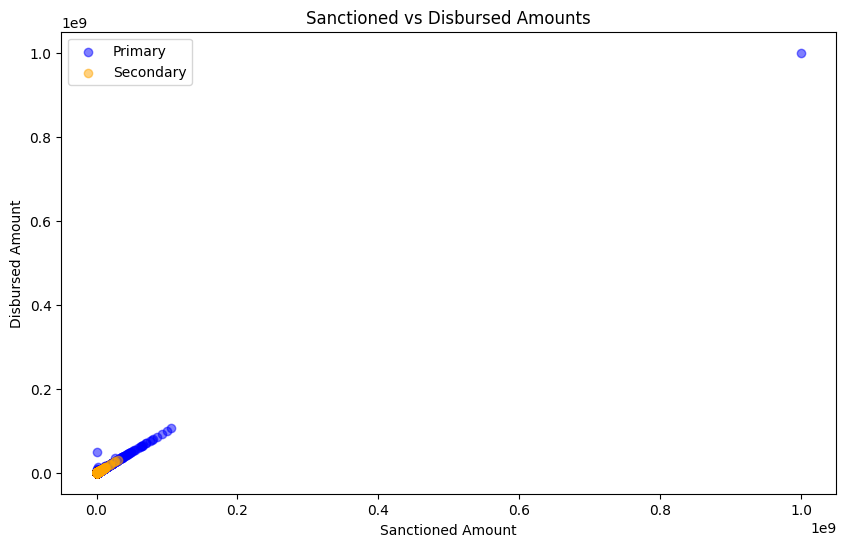

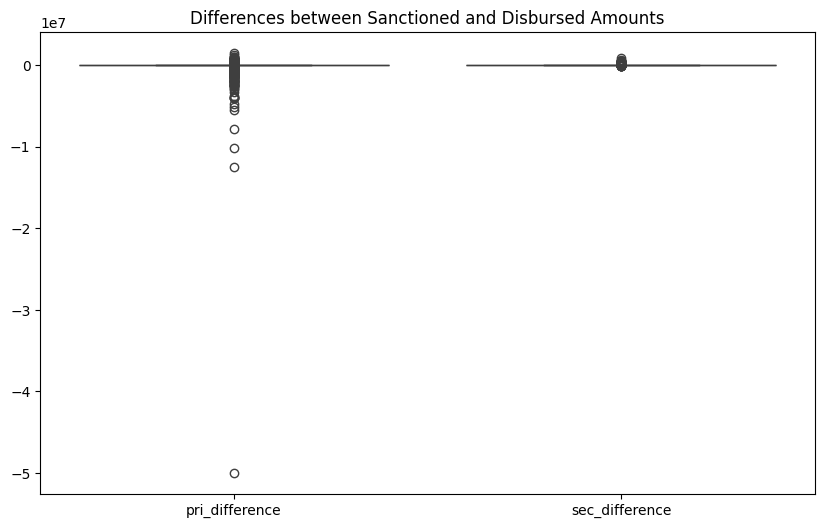

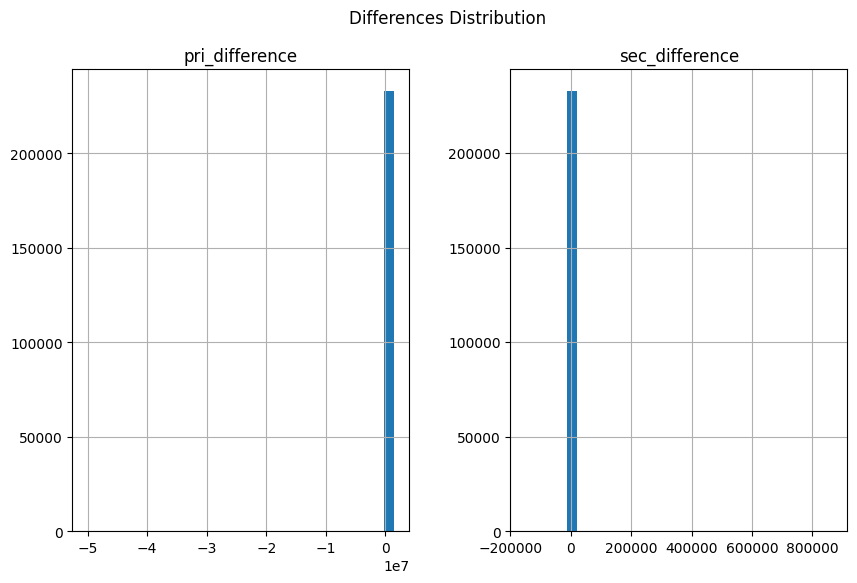

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Extract the relevant columns
sanctioned_amounts = ['pri_sanctioned_amount', 'sec_sanctioned_amount']
disbursed_amounts = ['pri_disbursed_amount', 'sec_disbursed_amount']

# Calculate basic statistics
sanctioned_stats = df[sanctioned_amounts].describe()
disbursed_stats = df[disbursed_amounts].describe()

#print("Sanctioned Amounts Statistics:\n", sanctioned_stats)
#print("\nDisbursed Amounts Statistics:\n", disbursed_stats)

# Visualize the data with boxplots
def plot_boxplot(features, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[features])
    plt.title(title)
    plt.show()

plot_boxplot(sanctioned_amounts, 'Sanctioned Amounts')
plot_boxplot(disbursed_amounts, 'Disbursed Amounts')

# Visualize the data with histograms
def plot_histogram(features, title):
    df[features].hist(bins=30, figsize=(10, 6))
    plt.suptitle(title)
    plt.show()

plot_histogram(sanctioned_amounts, 'Sanctioned Amounts Distribution')
plot_histogram(disbursed_amounts, 'Disbursed Amounts Distribution')

# Perform paired t-tests to compare sanctioned and disbursed amounts
t_stat_sanctioned, p_value_sanctioned = stats.ttest_rel(df['pri_sanctioned_amount'], df['sec_sanctioned_amount'], nan_policy='omit')
t_stat_disbursed, p_value_disbursed = stats.ttest_rel(df['pri_disbursed_amount'], df['sec_disbursed_amount'], nan_policy='omit')

#print(f'T-test for Sanctioned Amounts: t-statistic = {t_stat_sanctioned}, p-value = {p_value_sanctioned}')
#print(f'T-test for Disbursed Amounts: t-statistic = {t_stat_disbursed}, p-value = {p_value_disbursed}')

# Scatter plot to visualize the relationship between sanctioned and disbursed amounts
plt.figure(figsize=(10, 6))
plt.scatter(df['pri_sanctioned_amount'], df['pri_disbursed_amount'], alpha=0.5, label='Primary', c='blue')
plt.scatter(df['sec_sanctioned_amount'], df['sec_disbursed_amount'], alpha=0.5, label='Secondary', c='orange')
plt.xlabel('Sanctioned Amount')
plt.ylabel('Disbursed Amount')
plt.legend()
plt.title('Sanctioned vs Disbursed Amounts')
plt.show()

# Calculate the differences and describe the statistics
df['pri_difference'] = df['pri_sanctioned_amount'] - df['pri_disbursed_amount']
df['sec_difference'] = df['sec_sanctioned_amount'] - df['sec_disbursed_amount']

difference_stats = df[['pri_difference', 'sec_difference']].describe()
#print("\nDifferences Statistics:\n", difference_stats)

# Visualize the differences with boxplots
plot_boxplot(['pri_difference', 'sec_difference'], 'Differences between Sanctioned and Disbursed Amounts')

# Visualize the differences with histograms
plot_histogram(['pri_difference', 'sec_difference'], 'Differences Distribution')

# Perform t-test to compare differences
t_stat_difference, p_value_difference = stats.ttest_rel(df['pri_difference'], df['sec_difference'], nan_policy='omit')
#print(f'T-test for Differences: t-statistic = {t_stat_difference}, p-value = {p_value_difference}')


### 3.4. Do customers who make higher numbers of inquiries end up being higher risk candidates?


       no_of_inquiries   loan_default
count    233154.000000  233154.000000
mean          0.206615       0.217071
std           0.706498       0.412252
min           0.000000       0.000000
25%           0.000000       0.000000
50%           0.000000       0.000000
75%           0.000000       0.000000
max          36.000000       1.000000


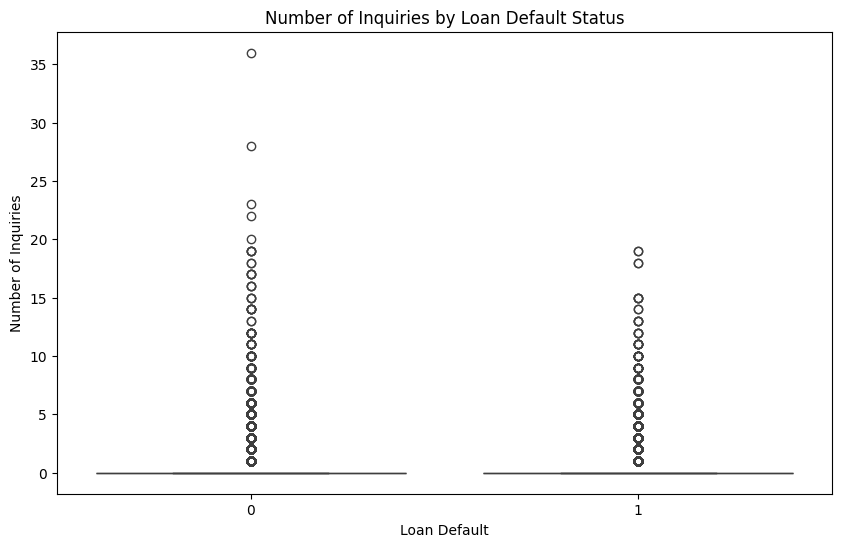

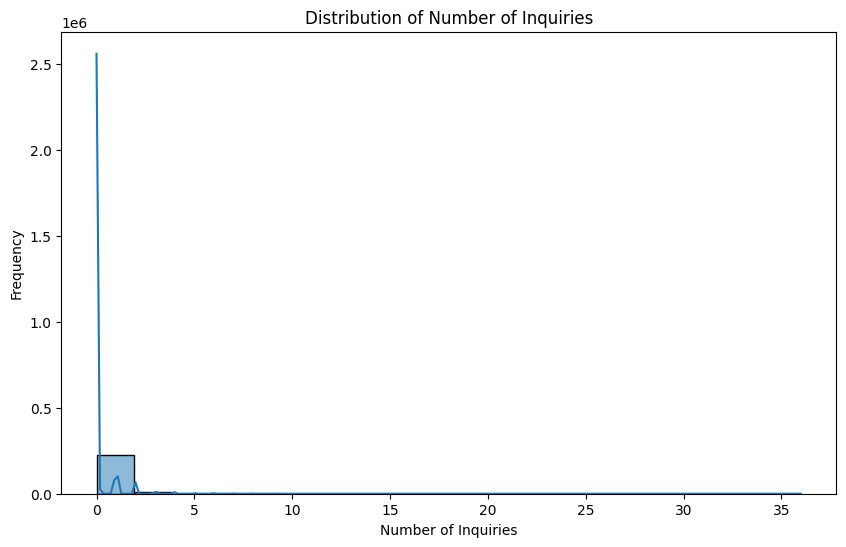

Average Number of Inquiries for Defaulters: 0.26521902353243365
Average Number of Inquiries for Non-Defaulters: 0.19036610552034317
T-test: t-statistic = 21.110344428166638, p-value = 7.912566786376203e-99


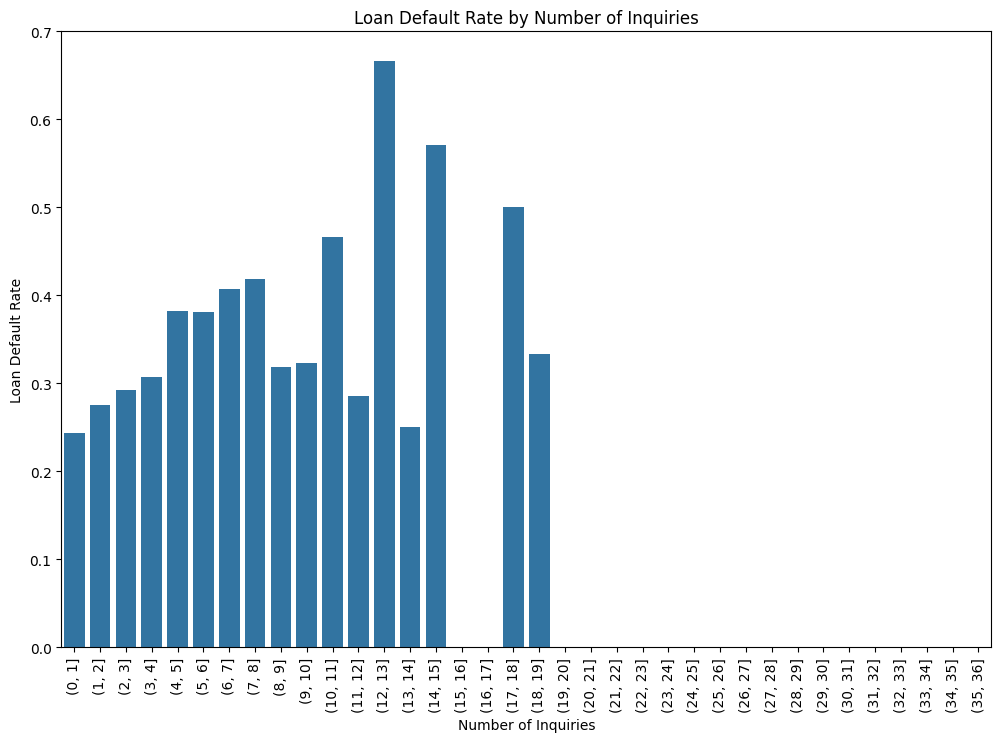

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Inspect the relevant columns
print(df[['no_of_inquiries', 'loan_default']].describe())

# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_default', y='no_of_inquiries', data=df)
plt.title('Number of Inquiries by Loan Default Status')
plt.xlabel('Loan Default')
plt.ylabel('Number of Inquiries')
plt.show()

# Visualize the distribution of the number of inquiries
plt.figure(figsize=(10, 6))
sns.histplot(df['no_of_inquiries'], kde=True)
plt.title('Distribution of Number of Inquiries')
plt.xlabel('Number of Inquiries')
plt.ylabel('Frequency')
plt.show()

# Calculate the average number of inquiries for defaulters and non-defaulters
avg_inquiries_default = df[df['loan_default'] == 1]['no_of_inquiries'].mean()
avg_inquiries_non_default = df[df['loan_default'] == 0]['no_of_inquiries'].mean()

print(f'Average Number of Inquiries for Defaulters: {avg_inquiries_default}')
print(f'Average Number of Inquiries for Non-Defaulters: {avg_inquiries_non_default}')

# Perform a t-test to check if there's a significant difference in the number of inquiries
default_inquiries = df[df['loan_default'] == 1]['no_of_inquiries']
non_default_inquiries = df[df['loan_default'] == 0]['no_of_inquiries']
t_stat, p_value = stats.ttest_ind(default_inquiries, non_default_inquiries, nan_policy='omit')

print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

# Visualize the relationship between number of inquiries and loan default rate
df['inquiry_bins'] = pd.cut(df['no_of_inquiries'], bins=range(0, df['no_of_inquiries'].max() + 1, 1))
default_rate_by_inquiry = df.groupby('inquiry_bins')['loan_default'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='inquiry_bins', y='loan_default', data=default_rate_by_inquiry)
plt.title('Loan Default Rate by Number of Inquiries')
plt.xlabel('Number of Inquiries')
plt.ylabel('Loan Default Rate')
plt.xticks(rotation=90)
plt.show()

# Clean up the bin labels
df.drop(columns=['inquiry_bins'], inplace=True)


### 3.5. Is credit history, that is, new loans in the last six months, loans defaulted in the last six months, time since the first loan, etc., a significant factor in estimating the probability of loan defaulters?


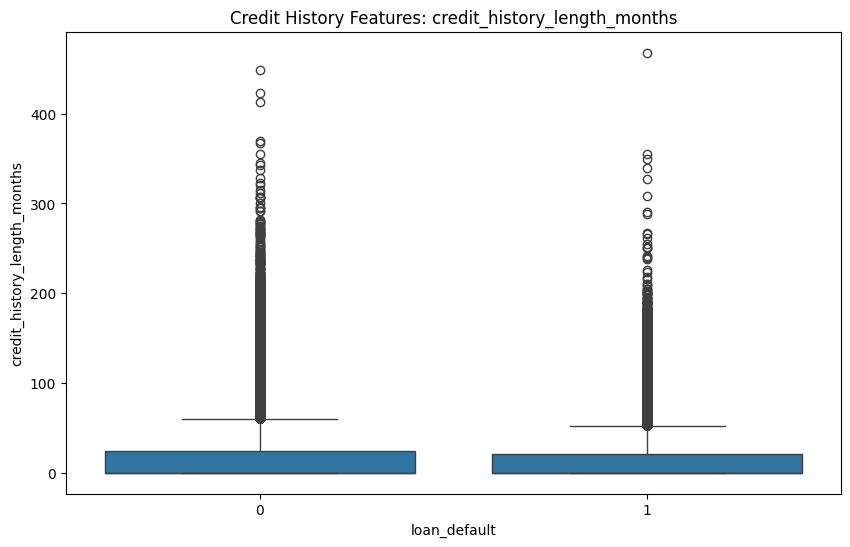

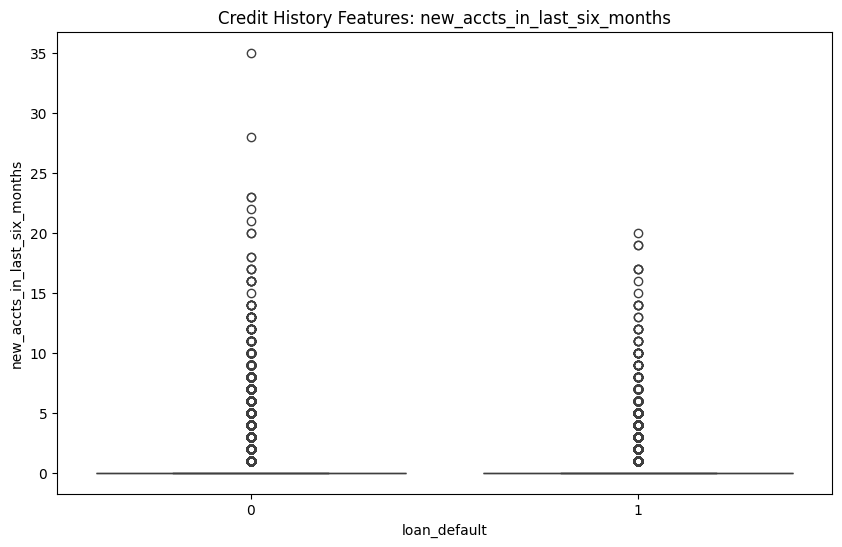

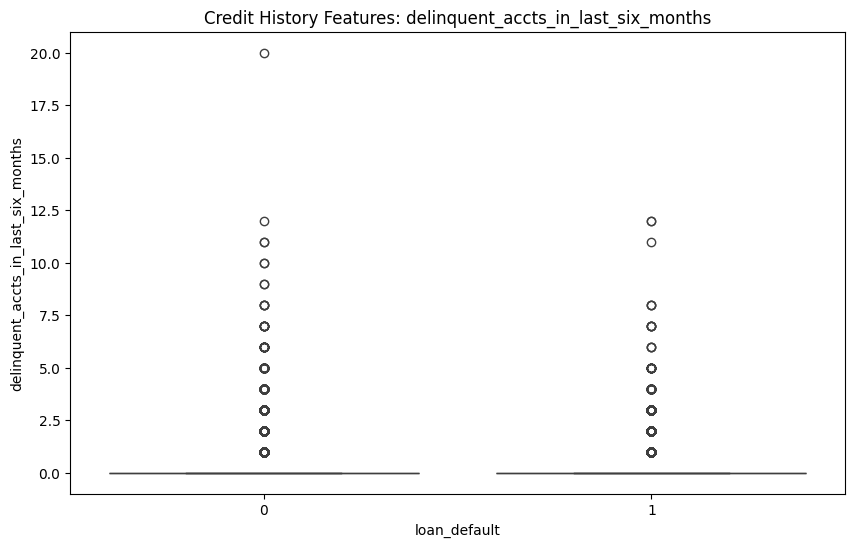

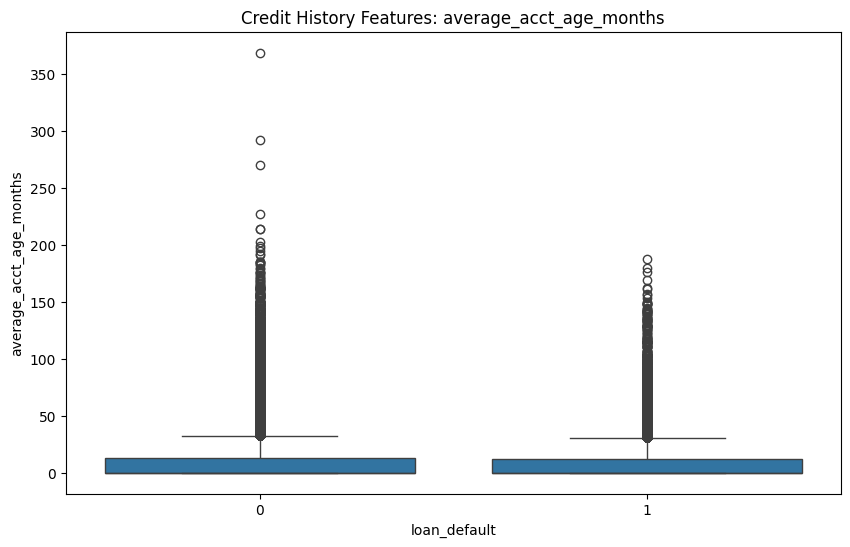


Correlation Matrix:
                                      credit_history_length_months  \
credit_history_length_months                             1.000000   
new_accts_in_last_six_months                             0.200087   
delinquent_accts_in_last_six_months                      0.262218   
average_acct_age_months                                  0.831952   
loan_default                                            -0.042126   

                                     new_accts_in_last_six_months  \
credit_history_length_months                             0.200087   
new_accts_in_last_six_months                             1.000000   
delinquent_accts_in_last_six_months                      0.182769   
average_acct_age_months                                  0.033372   
loan_default                                            -0.029400   

                                     delinquent_accts_in_last_six_months  \
credit_history_length_months                                    0.262218

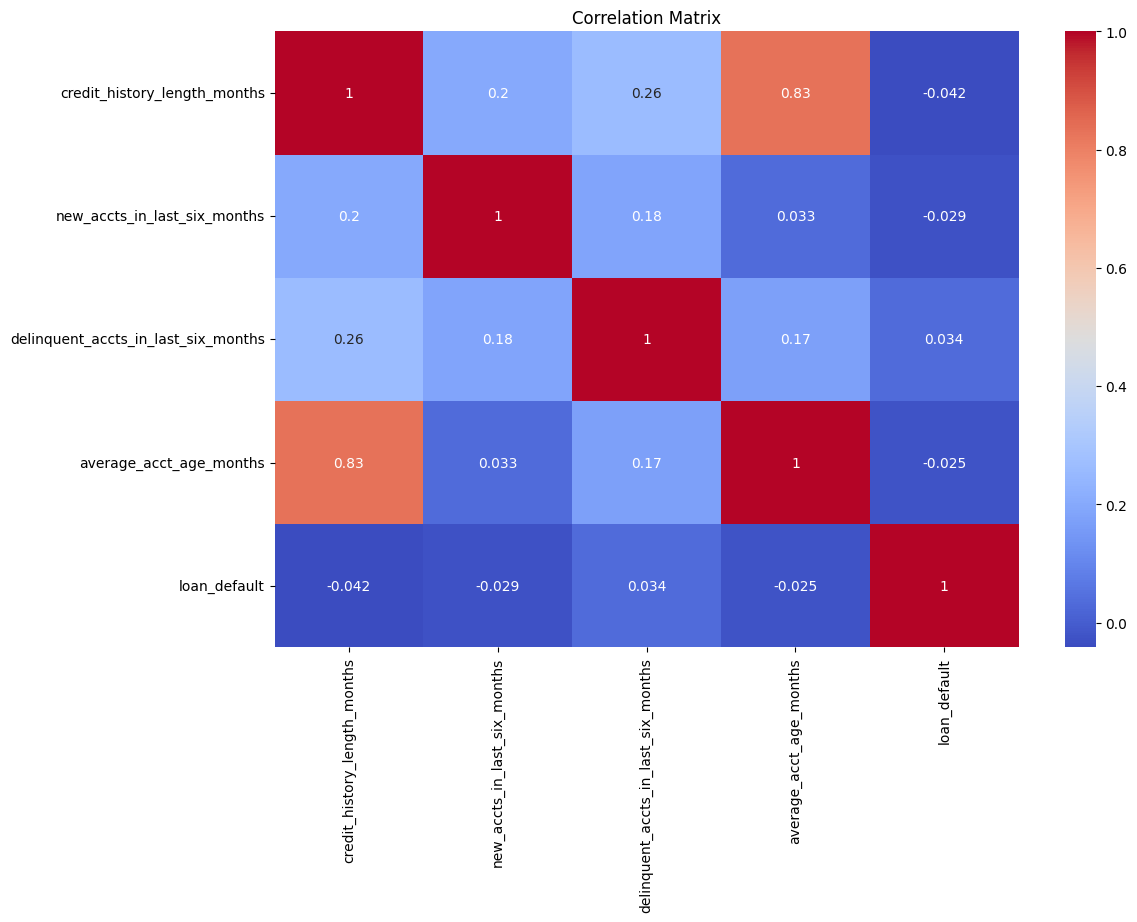

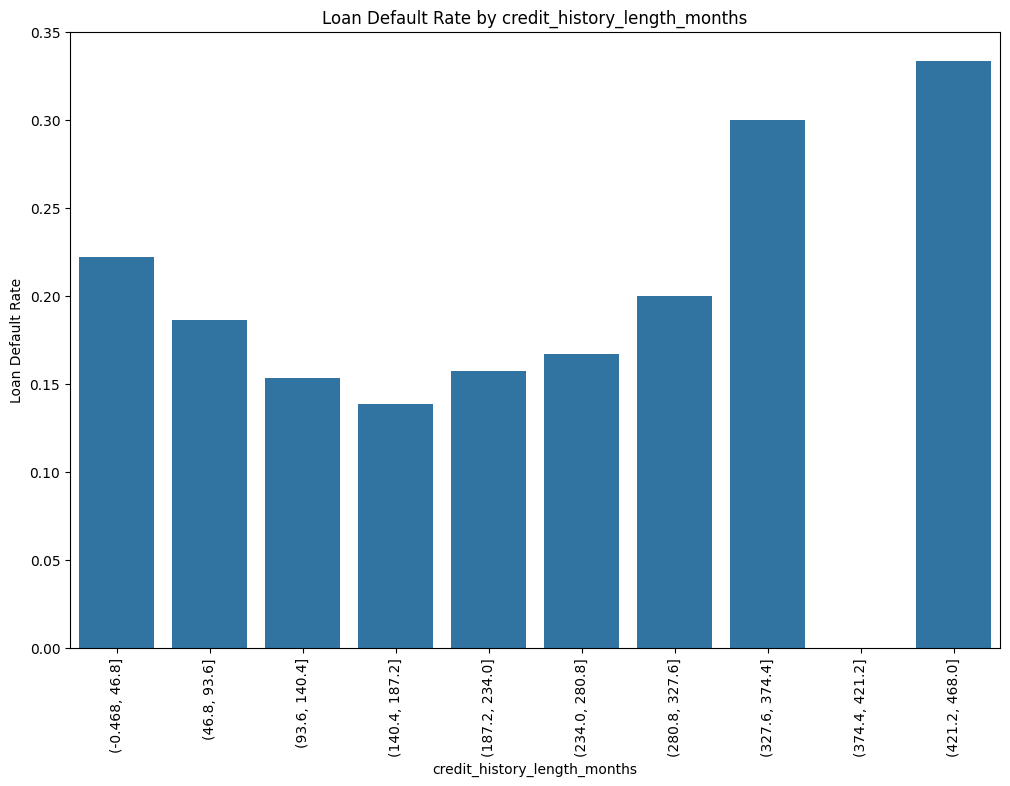

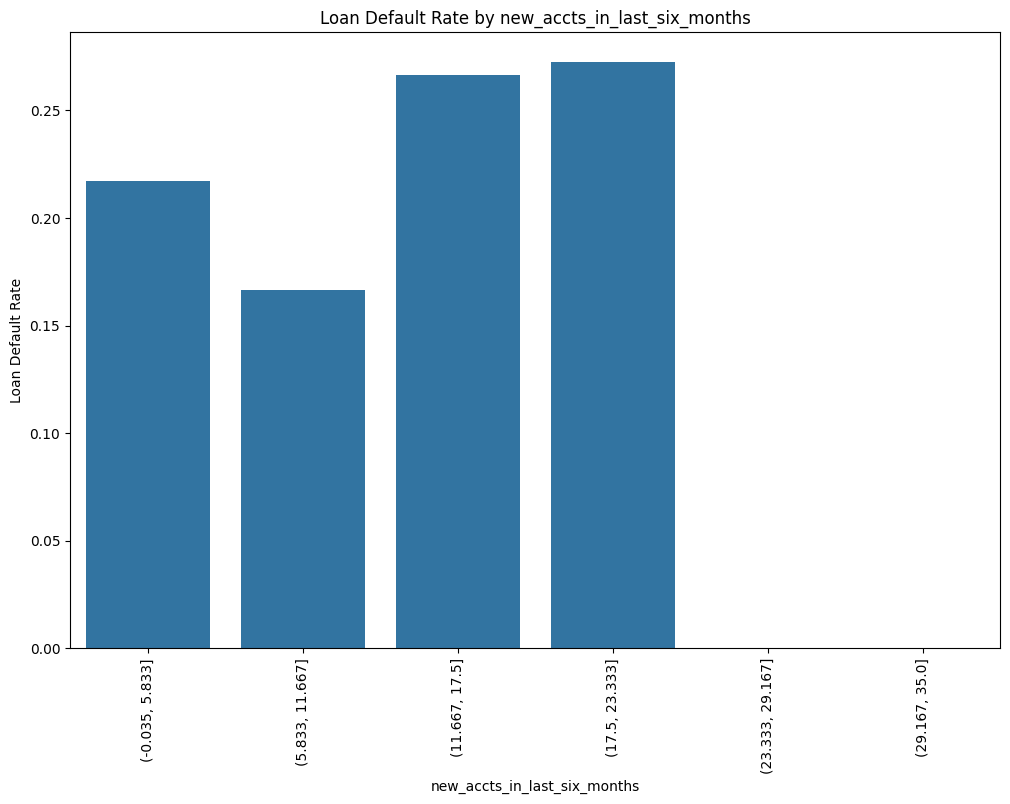

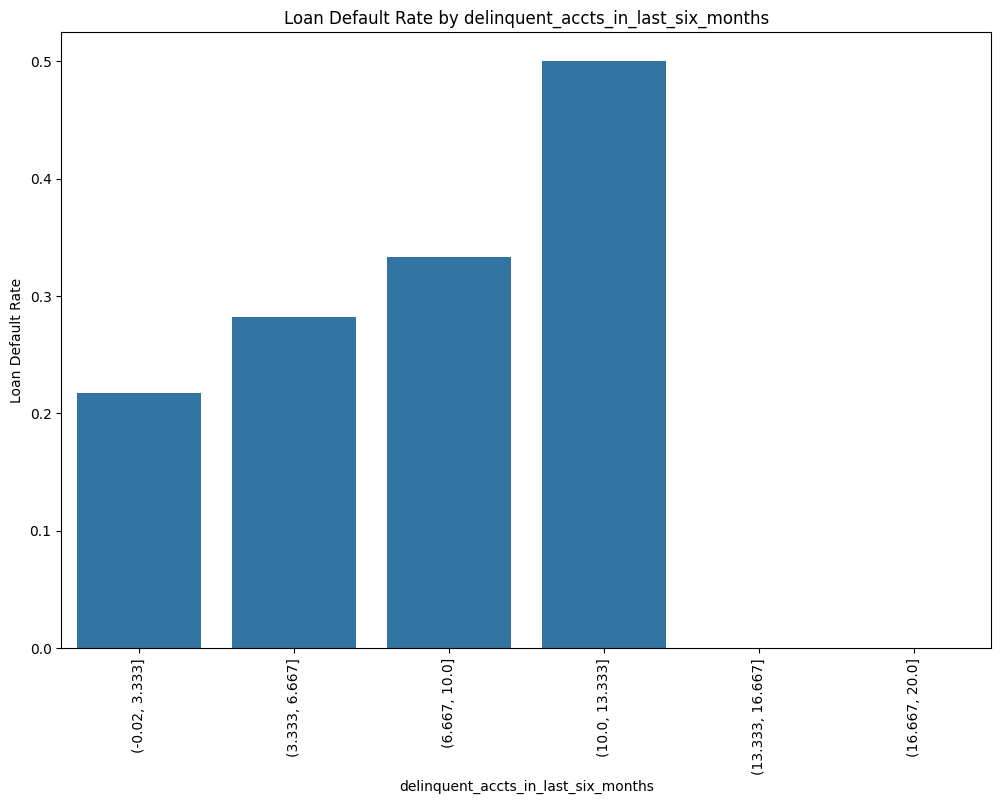

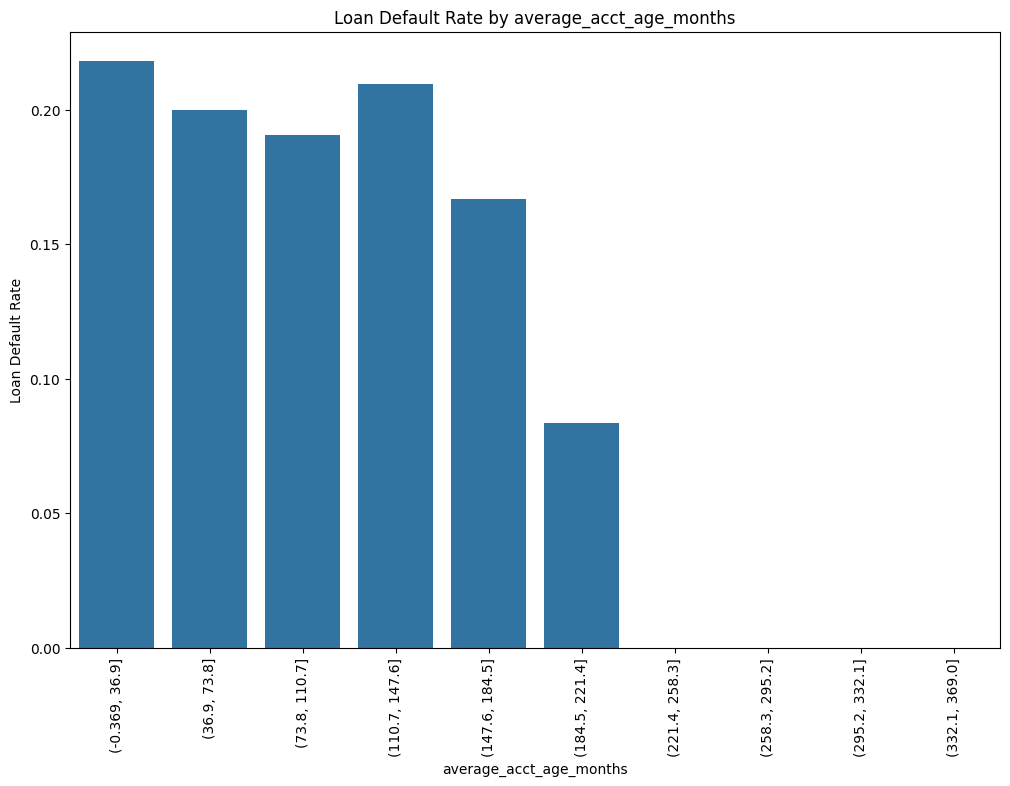

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# Function to convert '0yrs 0mon' format to total months
def convert_to_months(age_str):
    if pd.isnull(age_str):
        return 0
    years = int(re.search(r'(\d+)yrs', age_str).group(1)) if 'yrs' in age_str else 0
    months = int(re.search(r'(\d+)mon', age_str).group(1)) if 'mon' in age_str else 0
    return years * 12 + months

# Apply the conversion function to the 'credit_history_length' and 'average_acct_age' columns
df['credit_history_length_months'] = df['credit_history_length'].apply(convert_to_months)
df['average_acct_age_months'] = df['average_acct_age'].apply(convert_to_months)

# Inspect the relevant columns
credit_history_columns = ['credit_history_length_months', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age_months']
#print(df[credit_history_columns + ['loan_default']].describe())

# Visualize the data
def plot_features(features, target, title_prefix):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'{title_prefix}: {feature}')
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()

plot_features(credit_history_columns, 'loan_default', 'Credit History Features')

# Calculate the average of credit history features for defaulters and non-defaulters
for feature in credit_history_columns:
    avg_default = df[df['loan_default'] == 1][feature].mean()
    avg_non_default = df[df['loan_default'] == 0][feature].mean()
 #   print(f'Average {feature} for Defaulters: {avg_default}')
  #  print(f'Average {feature} for Non-Defaulters: {avg_non_default}')

# Perform t-tests to check if there's a significant difference in the credit history features
def t_test_features(features, target):
    for feature in features:
        default = df[df[target] == 1][feature]
        non_default = df[df[target] == 0][feature]
        t_stat, p_value = stats.ttest_ind(default, non_default, nan_policy='omit')
#        print(f'T-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}')

t_test_features(credit_history_columns, 'loan_default')

# Correlation analysis
correlation_matrix = df[credit_history_columns + ['loan_default']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between credit history features and loan default rate using bar plots
def plot_barplot(feature, target, bins):
    df[f'{feature}_bins'] = pd.cut(df[feature], bins=bins)
    default_rate_by_feature = df.groupby(f'{feature}_bins')[target].mean().reset_index()

    plt.figure(figsize=(12, 8))
    sns.barplot(x=f'{feature}_bins', y=target, data=default_rate_by_feature)
    plt.title(f'Loan Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Loan Default Rate')
    plt.xticks(rotation=90)
    plt.show()

    df.drop(columns=[f'{feature}_bins'], inplace=True)

# Define bins for the features
feature_bins = {
    'credit_history_length_months': 10,
    'new_accts_in_last_six_months': 6,
    'delinquent_accts_in_last_six_months': 6,
    'average_acct_age_months': 10
}

for feature, bins in feature_bins.items():
    plot_barplot(feature, 'loan_default', bins=bins)


### 3.6. Perform logistic regression modeling, predict the outcome for the test data, and validate the results using the confusion matrix.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert '0yrs 0mon' format to total months for 'credit_history_length' and 'average_acct_age'
def convert_to_months(age_str):
    if pd.isnull(age_str):
        return 0
    years = int(re.search(r'(\d+)yrs', age_str).group(1)) if 'yrs' in age_str else 0
    months = int(re.search(r'(\d+)mon', age_str).group(1)) if 'mon' in age_str else 0
    return years * 12 + months

df['credit_history_length_months'] = df['credit_history_length'].apply(convert_to_months)
df['average_acct_age_months'] = df['average_acct_age'].apply(convert_to_months)

# Define the features and the target
features = ['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
            'manufacturer_id', 'current_pincode_id', 'date_of_birth', 'employment_type',
            'disbursaldate', 'state_id', 'employee_code_id', 'mobileno_avl_flag',
            'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag',
            'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
            'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
            'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
            'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
            'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age_months',
            'credit_history_length_months', 'no_of_inquiries', 'age', 'pri_difference', 'sec_difference']

target = 'loan_default'

# Encode categorical variables
label_encoders = {}
for column in ['employment_type', 'date_of_birth', 'disbursaldate']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the outcomes for the test data
y_pred = model.predict(X_test)

# Validate the results using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy Score:')
print(accuracy)


Confusion Matrix:
[[36646    87]
 [ 9845    53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36733
           1       0.38      0.01      0.01      9898

    accuracy                           0.79     46631
   macro avg       0.58      0.50      0.45     46631
weighted avg       0.70      0.79      0.70     46631


Accuracy Score:
0.7870086423194871


# Thank You